### Goal
**Decompose the Multi-Controlled NOT (MCX) Gate into CNOT (CX) and Single-Qubit Unitary (U) Gates**

### Given
- An MCX gate with $n$ control qubits and 1 target qubit.

### Output
1. **List of Gates**: A sequence of CX and U gates that, when applied in order, will perform the same operation as the given MCX gate.
   
2. **Quantum Circuit**: A visual representation (circuit diagram) of the decomposition using standard quantum gates.

### Problem Description

#### What is an MCX Gate?
The MCX gate, or multi-controlled X gate, flips the target qubit if all control qubits are in the state $|1\rangle$. Mathematically, if we have $n$ control qubits $C_1, C_2, \ldots, C_n$ and a target qubit $T$, the MCX gate performs the following operation:

$$
\text{MCX}_{C_1 C_2 \ldots C_n T} |c_1 c_2 \ldots c_n t\rangle = |c_1 c_2 \ldots c_n\rangle |t \oplus (c_1 \land c_2 \land \ldots \land c_n)\rangle 
$$

Here, $\oplus$ denotes addition modulo 2 (XOR), and $\land$ denotes the logical AND operation.

#### Why Decompose the MCX Gate?
Quantum computers might not directly support MCX gates, especially with a large number of control qubits. To implement algorithms using MCX gates on actual quantum hardware, we need to decompose them into gates that are natively supported, like CX and U gates.

### Steps to Approach

1. **Understand the MCX Gate**: Recognize the functionality and action of the MCX gate on various qubit states.

2. **Identify Basic Gates**: Understand the functionalities of the CX gate and various U gates (e.g., U3, U1).

3. **Decompose into Toffoli Gate**: If the MCX gate has more than 2 control qubits, decompose it into a sequence of Toffoli (CCX) gates using ancillary qubits.

4. **Decompose Toffoli Gate**: Further decompose the Toffoli gate into single-qubit and CX gates.

5. **Optimize**: (Advanced) Try to optimize the gate sequence for reduced gate count or improved accuracy.

6. **Verify**: Ensure that the decomposed circuit performs the same operation as the original MCX gate by testing on various input states.

### Example and Solution
- **Example**: Provide a specific example with a small number of qubits for clarity.
- **Solution**: Walk through the decomposition step by step, explaining the role of each gate and ensuring the final state is equivalent to the action of the original MCX gate.

### Exercises
- **Practice Problems**: Offer a few practice problems with different numbers of control qubits and different initial states.
- **Solutions**: Provide detailed solutions to affirm the understanding of the decomposition process.

### Additional Notes
- **Quantum Cost**: Discuss the implications of decomposing gates in terms of quantum cost, error rates, and resource usage.
- **Advanced Topics**: Introduce the concept of gate approximation and error mitigation for advanced learners.


### CNOT (CX) Gate

The Controlled NOT (CNOT) gate, also referred to as the CX gate, plays a pivotal role in quantum computing by allowing entanglement between qubits. The gate operates on two qubits: a control qubit and a target qubit. It flips (applies a NOT or $X$ operation to) the target qubit only when the control qubit is in the state $|1\rangle$. The matrix representation of the CNOT gate is:

$$
\text{CNOT} = \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end{bmatrix}
$$

In this representation, the first qubit is the control and the second is the target. If we reverse their roles, we need to swap the positions of the "1" elements in the bottom right quadrant of the matrix.

#### Quantum Circuit Symbol: 
The CNOT gate is typically represented in quantum circuits as a plus sign inside a circle (control qubit) connected by a line to another qubit with an "X" (target qubit).

### U Gates

U gates form a family of single-qubit gates that allow for various types of rotations and transformations of a qubit's state. These gates help in adjusting the phases and probabilities in a quantum algorithm.

#### U3 Gate
The U3 gate is a general single-qubit rotation gate, parameterized by three angles. It is defined as:

$$
U3(\theta, \phi, \lambda) = \begin{bmatrix}
\cos(\theta/2) & -e^{i \lambda}\sin(\theta/2) \\
e^{i \phi}\sin(\theta/2) & e^{i (\phi + \lambda)}\cos(\theta/2)
\end{bmatrix}
$$

- $\theta$ controls the "amount" of rotation and mixes the computational basis states.
- $\phi$ and $\lambda$ control the phase of the qubit.

#### Other U Gates
- **U1 Gate (Phase Gate)**: Applies a phase shift to the qubit state and is defined by a single parameter $\lambda$.
  
  $$ 
  U1(\lambda) = \begin{bmatrix}
  1 & 0 \\
  0 & e^{i \lambda}
  \end{bmatrix}
  $$

- **U2 Gate**: A rotation gate defined by two parameters, $\phi$ and $\lambda$. It is a special case of the U3 gate with $\theta = \pi/2$.

  $$
  U2(\phi, \lambda) = \frac{1}{\sqrt{2}}\begin{bmatrix}
  1 & -e^{i \lambda} \\
  e^{i \phi} & e^{i (\phi + \lambda)}
  \end{bmatrix}
  $$

These U gates, along with the CNOT gate, form a universal gate set, meaning that any quantum operation can be approximated arbitrarily well using just these gates. Understanding these fundamental gates will lay a solid foundation for grasping more complex quantum circuits and algorithms.


In [224]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister


In [225]:
# Build a quantum circuit
circuit = QuantumCircuit(3, 3)

circuit.x(1)
circuit.h(range(3))
circuit.cx(0, 1)
circuit.measure(range(3), range(3));

In [181]:
print(circuit)

     ┌───┐          ┌─┐   
q_0: ┤ H ├───────■──┤M├───
     ├───┤┌───┐┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ H ├┤ X ├─╫─┤M├
     ├───┤└┬─┬┘└───┘ ║ └╥┘
q_2: ┤ H ├─┤M├───────╫──╫─
     └───┘ └╥┘       ║  ║ 
c: 3/═══════╩════════╩══╩═
            2        0  1 


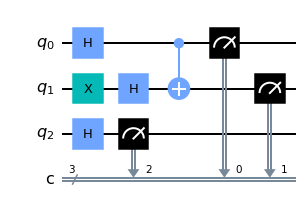

In [182]:
circuit.draw('mpl')

In [183]:
# Build a quantum circuit
circuit = QuantumCircuit(3, 3)

circuit.ccx(0, 1, 2)
circuit.measure(range(3), range(3));

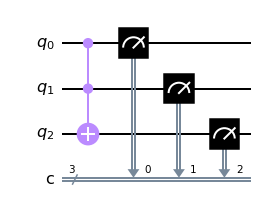

In [184]:
circuit.draw('mpl')

<class 'qiskit.circuit.library.standard_gates.x.CCXGate'>


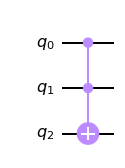

In [185]:
from qiskit.circuit.library import CCXGate

print(CCXGate)
# Build a quantum circuit
circuit = QuantumCircuit(3)

circuit.append(CCXGate(), [0, 1, 2])
circuit.draw('mpl')

In [186]:
mm = CCXGate().to_matrix()
print(type(mm), mm.shape)

<class 'numpy.ndarray'> (8, 8)


In [187]:
from qiskit.visualization import array_to_latex

In [188]:
array_to_latex(mm)

<IPython.core.display.Latex object>

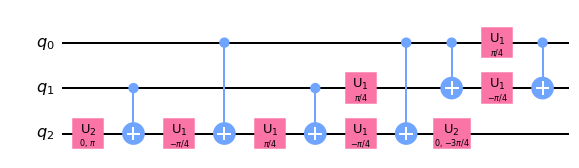

In [189]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_gate_map, plot_circuit_layout
import qiskit.quantum_info as qi
from qiskit.visualization import array_to_latex

# Create a quantum circuit
qc = QuantumCircuit(3)

# Add a Toffoli gate
qc.ccx(0, 1, 2)

# Decompose the circuit to basis gates {u1,u2,u3,cx}
qc_decomposed = transpile(qc, basis_gates=['u1','u2','u3','cx'])

# Visualize the decomposed circuit
qc_decomposed.draw('mpl')


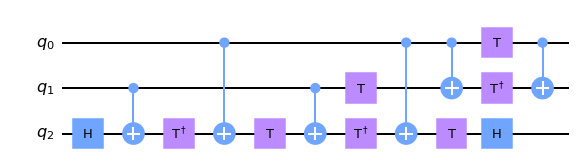

In [190]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_gate_map, plot_circuit_layout
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import array_to_latex

def custom_toffoli(qc, a, b, c):
    """
    Implements a Toffoli gate using qubits a, b as controls, and c as target.
    Utilizes CNOT and U gates.
    """
    # Angle for rotations
    theta = np.pi/2
    
    # Apply Hadamard to the target qubit
    qc.h(c)
    
    # Apply controlled rotations
    qc.cx(b, c)
    qc.tdg(c)
    qc.cx(a, c)
    qc.t(c)
    qc.cx(b, c)
    qc.tdg(c)
    qc.cx(a, c)
    
    # Apply additional gates
    qc.t(b)
    qc.t(c)
    qc.h(c)
    qc.cx(a, b)
    qc.t(a)
    qc.tdg(b)
    qc.cx(a, b)

# Create a quantum circuit
qc = QuantumCircuit(3)

# Apply the custom Toffoli gate
custom_toffoli(qc, 0, 1, 2)
toffoli_gate = qc.to_gate(label = 'Toff')
# Visualize the circuit
qc.draw('mpl')


In [191]:
from qiskit import QuantumCircuit
from qiskit import Aer, transpile

import qiskit.quantum_info as qi
import numpy as np

def are_circuits_equivalent(circuit1, circuit2, num_qubits):
    # Transpile circuits to ensure that they are expressed in terms of the same gate set
#     circuit1 = transpile(circuit1, basis_gates=['u1','u2','u3','cx'])
#     circuit2 = transpile(circuit2, basis_gates=['u1','u2','u3','cx'])

    # Method 1: Compare Unitary Matrices
    unitary1 = qi.Operator(circuit1)
    unitary2 = qi.Operator(circuit2)
    
    # Check if unitaries are equal (up to a global phase)
    if unitary1.equiv(unitary2):
        print("Method 1: Circuits are equivalent")
    else:
        print("Method 1: Circuits are NOT equivalent")
    
    # Method 2: Compare Outputs on All Basis States
    simulator = Aer.get_backend('statevector_simulator')
    equivalent = True
    
    for i in range(2**num_qubits):
        # Create a binary string of the current i, padded with zeros to match num_qubits
        input_state = format(i, f'0{num_qubits}b')
        
        # Initialize circuits with the current input state
        test_circuit1 = QuantumCircuit(num_qubits)
        test_circuit2 = QuantumCircuit(num_qubits)
        
        for j, bit in enumerate(input_state):
            if bit == '1':
                test_circuit1.x(j)
                test_circuit2.x(j)
        
        # Append the circuits to be checked
        test_circuit1 = test_circuit1.compose(circuit1)
        test_circuit2 = test_circuit2.compose(circuit2)
        
        # Get final statevectors
        result1 = simulator.run(test_circuit1).result().get_statevector()
        result2 = simulator.run(test_circuit2).result().get_statevector()
        
        # Check if the output states are equal (up to a global phase)
#         print(np.angle(result1), np.angle(result2))
        if not np.allclose(np.angle(result1), np.angle(result2), atol=1e-8):
            equivalent = False
            break
    
    if equivalent:
        print("Method 2: Circuits are equivalent")
    else:
        print("Method 2: Circuits are NOT equivalent")

# Example usage:
# Create two circuits (circuit1 and circuit2) and then check if they are equivalent:
# are_circuits_equivalent(circuit1, circuit2, num_qubits)


In [192]:
are_circuits_equivalent(qc, qc_decomposed, 3)
   

Method 1: Circuits are equivalent
Method 2: Circuits are NOT equivalent


In [193]:
print([op.operation.name for op in qc.data])
print()
print([op.operation.name for op in qc_decomposed.data])

['h', 'cx', 'tdg', 'cx', 't', 'cx', 'tdg', 'cx', 't', 't', 'h', 'cx', 't', 'tdg', 'cx']

['u2', 'cx', 'u1', 'cx', 'u1', 'cx', 'u1', 'u1', 'cx', 'cx', 'u1', 'u1', 'cx', 'u2']


In [196]:
from qiskit import QuantumCircuit, transpile, Aer
from qiskit.visualization import array_to_latex
import qiskit.quantum_info as qi
import numpy as np

# Create quantum circuit with the built-in Toffoli
qc_built_in = QuantumCircuit(3)
qc_built_in.ccx(0, 1, 2)

# Create quantum circuit with the custom Toffoli
qc_custom = QuantumCircuit(3)
custom_toffoli(qc_custom, 0, 1, 2)  # assuming custom_toffoli is defined as before

# Get the unitary matrices
unitary_built_in = qi.Operator(qc_built_in).data
unitary_custom = qi.Operator(qc_custom).data

# Check if the unitaries are equal up to a global phase
if qi.Operator(qc_built_in).equiv(qc_custom):
    print("The built-in and custom Toffoli gates are equivalent up to a global phase.")
else:
    print("The built-in and custom Toffoli gates are NOT equivalent.")
    
# Display the unitary matrices
# array_to_latex(unitary_built_in)
array_to_latex(unitary_custom)


The built-in and custom Toffoli gates are equivalent up to a global phase.


<IPython.core.display.Latex object>

In [202]:
def custom_mcx_circuit(n):
    num_controls = n
    num_anc = num_controls - 2
    cntr = QuantumRegister(num_controls, 'ctrl')
    ancl = QuantumRegister(num_anc, 'ancl')
    targ = QuantumRegister(1, 'targ')
    qc = QuantumCircuit(cntr, ancl, targ)
    a = [x for x in range(n)]
    b = [x + n for x in range(n - 2)]
    c = n * 2 - 2
    return qc, a, b, c

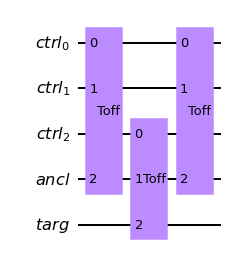

In [210]:
def custom_mcx(qc, control_qubits, auxiliary_qubits, target_qubit):
    num_controls = len(control_qubits)
    
    # Base case: if only two control qubits, apply custom Toffoli
    if num_controls == 2:
        qc.append(toffoli_gate, [control_qubits[0], control_qubits[1], target_qubit])
#         custom_toffoli(qc, control_qubits[0], control_qubits[1], target_qubit)
        return
    
    # Step 1: compute up to last ancilla using less controls
    custom_mcx(qc, control_qubits[:-1], auxiliary_qubits[:-1], auxiliary_qubits[-1])
    
    # Step 2: Apply
    qc.append(toffoli_gate, [control_qubits[-1], auxiliary_qubits[-1], target_qubit])
#     custom_mcx(qc, [control_qubits[-1], auxiliary_qubits[-1]], auxiliary_qubits[-1], target_qubit)
    
    # Step 3: Uncompute
    custom_mcx(qc, control_qubits[:-1], auxiliary_qubits[:-1], auxiliary_qubits[-1])
    
# Example usage:
qc, control_qubits, auxiliary_qubits, target_qubit = custom_mcx_circuit(3)

custom_mcx(qc, control_qubits, auxiliary_qubits,  target_qubit)
qc.draw('mpl')

In [222]:
from qiskit import QuantumCircuit, transpile, Aer
from qiskit.quantum_info import Operator
import numpy as np

# Define the number of control qubits and auxiliary qubits
num_controls = 5
qc, control_qubits, auxiliary_qubits, target_qubit = custom_mcx_circuit(num_controls)

# Create a quantum circuit using the built-in MCX gate
qc_built_in = QuantumCircuit(num_controls + len(auxiliary_qubits) + 1)  
qc_built_in.mcx(control_qubits, target_qubit, auxiliary_qubits, mode='basic')  # Using basic mode for simplicity
qc_built_in = transpile(qc_built_in, basis_gates=['cx','u3'])  # Transpile to CNOT and U3 gates

# Create a quantum circuit using the custom MCX function
qc_custom = QuantumCircuit(num_controls + len(auxiliary_qubits) + 1)  # +1 for the target qubit, +1 for auxiliary qubit
custom_mcx(qc_custom, control_qubits, auxiliary_qubits, target_qubit)

# Get the unitary matrices
unitary_built_in = qi.Operator(qc_built_in).data
unitary_custom = qi.Operator(qc_custom).data

# Check if the unitaries are equal up to a global phase
if qi.Operator(qc_built_in).equiv(qc_custom):
    print("The built-in and custom Toffoli gates are equivalent up to a global phase.")
else:
    print("The built-in and custom Toffoli gates are NOT equivalent.")
    

found_diff = False
for i in range(len(unitary_built_in)):
    for j in range(len(unitary_built_in)):
        if abs(unitary_built_in[i][j] - unitary_custom[i][j]) > 1e-8:
            print(i, j, unitary_built_in[i][j], unitary_custom[i][j],
                 np.round(abs(unitary_built_in[i][j] - unitary_custom[i][j])))
            found_diff = True

if (found_diff == False):
    print("No Diff")
else:
    print("Diff above")
  
# Display the unitary matrices
# array_to_latex(unitary_built_in, max_size=8)
array_to_latex(unitary_custom, max_size=8)


The built-in and custom Toffoli gates are equivalent up to a global phase.
No Diff


<IPython.core.display.Latex object>

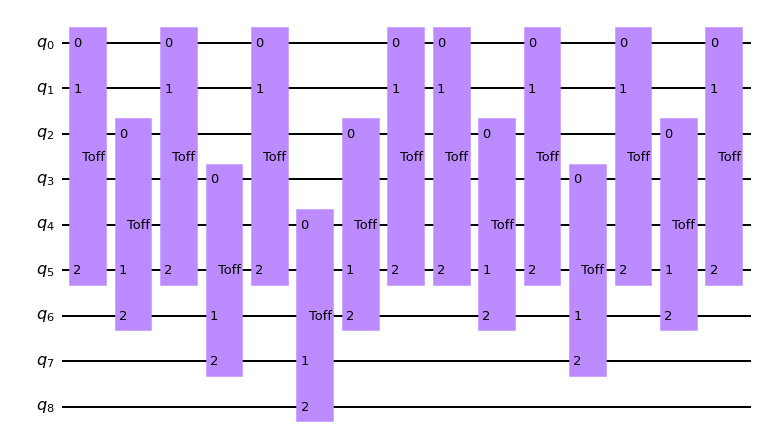

In [223]:
qc_custom.draw('mpl')